In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# 📌 Step 2: Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),

        Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = create_cnn_model()
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:

# 📌 Step 5: Train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128,
                    verbose=2)

Epoch 1/10
469/469 - 43s - 93ms/step - accuracy: 0.9260 - loss: 0.2452 - val_accuracy: 0.6013 - val_loss: 0.9797
Epoch 2/10
469/469 - 41s - 87ms/step - accuracy: 0.9733 - loss: 0.0885 - val_accuracy: 0.9883 - val_loss: 0.0342
Epoch 3/10
469/469 - 40s - 86ms/step - accuracy: 0.9777 - loss: 0.0712 - val_accuracy: 0.9882 - val_loss: 0.0354
Epoch 4/10
469/469 - 42s - 90ms/step - accuracy: 0.9818 - loss: 0.0578 - val_accuracy: 0.9898 - val_loss: 0.0306
Epoch 5/10
469/469 - 81s - 172ms/step - accuracy: 0.9838 - loss: 0.0527 - val_accuracy: 0.9882 - val_loss: 0.0404
Epoch 6/10
469/469 - 41s - 87ms/step - accuracy: 0.9854 - loss: 0.0466 - val_accuracy: 0.9914 - val_loss: 0.0265
Epoch 7/10
469/469 - 41s - 88ms/step - accuracy: 0.9870 - loss: 0.0417 - val_accuracy: 0.9904 - val_loss: 0.0272
Epoch 8/10
469/469 - 82s - 175ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9925 - val_loss: 0.0218
Epoch 9/10
469/469 - 81s - 173ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9921

In [ ]:
# 📌 Step 6: Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


✅ Test Accuracy: 99.21%


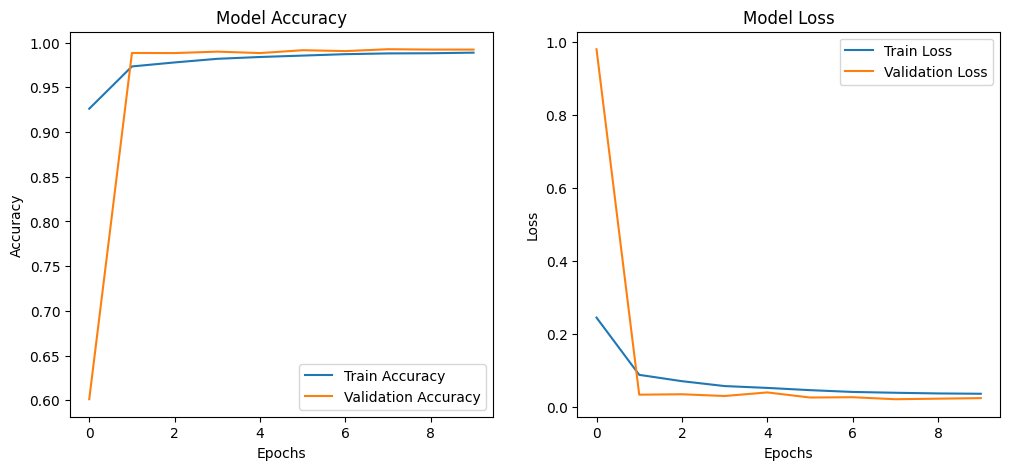

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
model.save("mnist_cnn_model.h5")
print("\n📁 Model saved as mnist_cnn_model.h5")


📁 Model saved as mnist_cnn_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


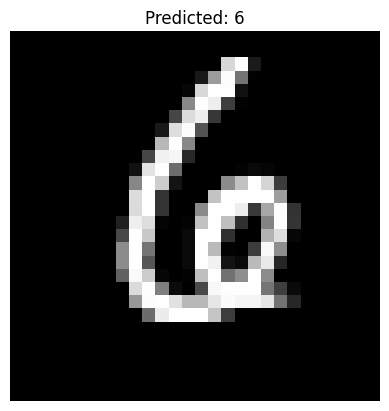

In [ ]:
import numpy as np

index = 123  # change this number to test different images
sample = x_test[index].reshape(1, 28, 28, 1)
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

plt.imshow(x_test[index].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()